In [1]:
from rdkit import Chem
from rdkit.Chem import DataStructs,AllChem,Draw
import pandas as pd
import numpy as np
from PIL import Image
from rdkit.Chem.Draw import IPythonConsole


AttributeError: module 'Image' has no attribute 'Image'

In [2]:
dataset = pd.read_csv('Dataset_After1.csv',index_col = 0)
dataset

,Molecule ChEMBL ID,Smiles,Standard Relation,Standard Value,Standard Units
0,CHEMBL2263120,CC1(C)CC[C@]2(C(=O)OCCCCCCCCCCC(=O)O)CC[C@]3(C...,'=',0.7200,nM
1,CHEMBL2263121,CC1(C)CC[C@]2(C(=O)NC(Cc3ccccc3)C(=O)O)CC[C@]3...,'=',3.3100,nM
2,CHEMBL168,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@...,'=',5.0501,nM
3,CHEMBL508831,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@...,'=',0.5400,nM
4,CHEMBL506556,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@...,'=',0.6200,nM
...,...,...,...,...,...
1447,CHEMBL1782241,CC(C)=CCC/C(C)=C/Cc1c(O)c(CC=C(C)C)c(O)c2c(=O)...,'=',5.2000,nM
1448,CHEMBL323197,COc1c(O)cc2oc3cc(O)c(CC=C(C)C)c(O)c3c(=O)c2c1C...,'=',5.5000,nM
1449,CHEMBL4071698,CCCc1cc(O)cc(OC(=O)c2c(O)cc(O)cc2CCC)c1,'=',0.7200,nM
1450,CHEMBL3770020,CCCc1cc(O)cc(O)c1C(=O)O,'=',1.5800,nM


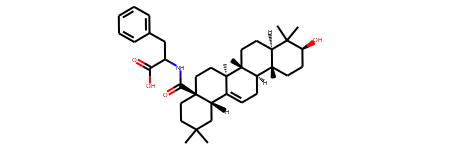

In [3]:
molSmiles = dataset["Smiles"].tolist()
molA = Chem.MolFromSmiles(molSmiles[1])
molA

In [4]:
molSmilesLs = [Chem.MolFromSmiles(molSmiles[i]) for i in range(3)]

img = Draw.MolsToGridImage(molSmilesLs)
img

AttributeError: module 'Image' has no attribute 'open'

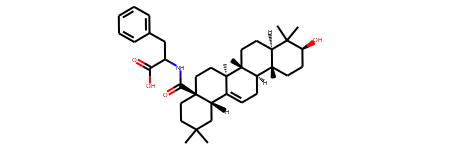

In [5]:
molSmilesLs[1]

In [6]:
fp = AllChem.GetMorganFingerprintAsBitVect(molSmilesLs[0],2,nBits=1024,bitInfo = bi)
fpArr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp,fpArr)
np.nonzero(fpArr)
list(fp.GetOnBits())
list(fpArr)''

SyntaxError: invalid syntax (<ipython-input-6-cc882f6f4736>, line 6)

In [17]:
bi = {}
#mol = [[molSmilesLs[0],x,bi] for x in fp.GetOnBits()]
#print(mol)

fpArr = np.zeros((1,))
molekul = 'C(C(=O)O)N'
smiles = Chem.MolFromSmiles(molekul)
fp = AllChem.GetMorganFingerprintAsBitVect(smiles,2,nBits=1024,bitInfo = bi)
DataStructs.ConvertToNumpyArray(fp,fpArr)
np.nonzero(fpArr)
list(fp.GetOnBits())



[27, 80, 147, 389, 650, 713, 807, 893, 966, 981]

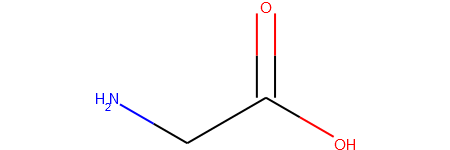

In [20]:
smiles

In [18]:
print(bi)

{27: ((0, 1),), 80: ((0, 0),), 147: ((4, 0),), 389: ((3, 1),), 650: ((2, 0),), 713: ((1, 1),), 807: ((1, 0), (3, 0)), 893: ((2, 1),), 966: ((0, 2),), 981: ((4, 1),)}


In [27]:
prints = [(smiles,x,bi) for x in fp.GetOnBits()]
#print(prints)
#smiles
Draw.DrawMorganBits(prints, molsPerRow = 4, legends=[str(x) for x in fp.GetOnBits()])
legends=[str(x) for x in fp.GetOnBits()]
print(legends)

['27', '80', '147', '389', '650', '713', '807', '893', '966', '981']
